<div class="alert alert-block alert-info">
<center>ESTATÍSTICA APLICADA</center>
<center>Lista 12</center>
<center>ALUNO: Diego Cardoso dos Santos</center>
</div>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Questão 1 ##

In [15]:
df = pd.read_csv('dados1.csv', sep=';', decimal=',', header=None, names= list('ABCDEFGHIJ'))

In [16]:
notas = pd.Series(df.values.reshape(100,))

In [17]:
fa, classes = np.histogram(notas, bins=5)
# Determina a frequência absoluta
fa = fa.astype(int)
# Determina a frequência relativa
fr = np.around(fa/fa.sum()*100,decimals=2)
# Determina a frequência cumulativa
fc = np.cumsum(fa).astype(int)

# For para criar os intervalos da classes de maneira visualmente bonita.
classe_str = []
for i in range(len(classes)):
    if i<=len(classes)-2:
        classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
    else:
        break
        
# Criação do DataFrame com suas respectivas ordens
df1 = pd.DataFrame({'Notas':classe_str, 
                         'FA': fa,
                         'FR %': fr, 
                         'FC': fc
                        }).set_index('Notas')

df1

,FA,FR %,FC
Notas,,,
1.50 |-- 3.20,8,8.0,8
3.20 |-- 4.90,17,17.0,25
4.90 |-- 6.60,44,44.0,69
6.60 |-- 8.30,22,22.0,91
8.30 |-- 10.00,9,9.0,100


<AxesSubplot:title={'center':'Frequências Relativa/Absoluta'}, ylabel='Notas'>

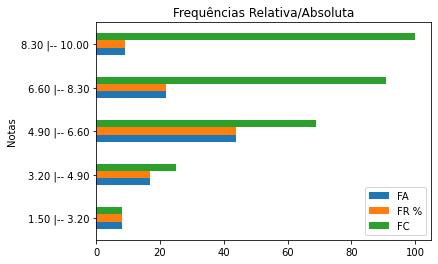

In [18]:
%matplotlib inline
df1.plot.barh(title='Frequências Relativa/Absoluta')

## Questão 2 ##
### Letra a) ###

###### Bairro: Qualitativa nominal
###### Tipo: Qualitativa nominal
###### N° de quartos: Quantitativa discreta
###### Preço: Quantitativa contínua

### Letra b) ###

In [19]:
df = pd.read_csv('dados2.csv', sep = ';')

In [20]:
def dis_freq(x, nc='auto', titulo='Classes'):
    """
    Essa função realiza a criação de uma tabela de frequência, onde se bote delimitar
    o tamanho das classes, e o título do índice.
    
    x: é preciso ser passado a coluna do DataFrame a ser feita a distribuição de frequência.
    """
    # Foi feita basicamente a mesma logica da questão 1
    fa,classes= np.histogram(x, bins=nc) 
    fa = fa.astype(int)
    fr = np.around(fa/fa.sum()*100,decimals=2)
    fc = np.cumsum(fa).astype(int)
    
    classe_str = []
    for i in range(len(classes)):
        if i<=len(classes)-2:
            classe_str.append('{:2.2f} |-- {:2.2f}' .format(classes[i],classes[i+1]))
        else:
            break        
    return pd.DataFrame({titulo:classe_str, 
                         'FA': fa,
                         'FR %': fr,
                         'FC': fc
                        }).set_index(titulo)

In [21]:
df_preco = dis_freq(df['Preço (mil)'], 5, 'Preços')

# Para os qualitativos fiz a frequência com value_counts.
df_bairro = pd.DataFrame({'FA': df['Bairro'].value_counts(),
                         'FR %': np.around(df['Bairro'].value_counts()/df['Bairro'].value_counts().sum()*100,decimals=2)}).rename_axis('Bairros')

df_tipo = pd.DataFrame({'FA': df['Tipo'].value_counts(), 
                        'FR %': np.around(df['Tipo'].value_counts()/df['Bairro'].value_counts().sum()*100,decimals=2)}).rename_axis('Tipos')

df_n_quartos = pd.DataFrame({'FA': df['N de quartos'].value_counts(),
                            'FR %': np.around(df['N de quartos'].value_counts()/df['Bairro'].value_counts().sum()*100,decimals=2)}).rename_axis('N° de Quartos')

In [22]:
display(df_preco)
display(df_bairro)
display(df_tipo)
display(df_n_quartos)

,FA,FR %,FC
Preços,,,
90.00 |-- 158.00,2,7.41,2
158.00 |-- 226.00,9,33.33,11
226.00 |-- 294.00,10,37.04,21
294.00 |-- 362.00,4,14.81,25
362.00 |-- 430.00,2,7.41,27


,FA,FR %
Bairros,,
Barra,4,14.81
Tijuca,3,11.11
Copacabana,3,11.11
Laranjeiras,2,7.41
Leblon,2,7.41
Flamengo,2,7.41
Gávea,1,3.70
Lagoa,1,3.70
São Conrado,1,3.70


,FA,FR %
Tipos,,
Apto.,20,74.07
Cobt.,3,11.11
Sala,2,7.41
Casa,2,7.41


,FA,FR %
N° de Quartos,,
2,9,33.33
3,8,29.63
>=4,6,22.22
1,3,11.11
0,1,3.70


### Letra c) ###

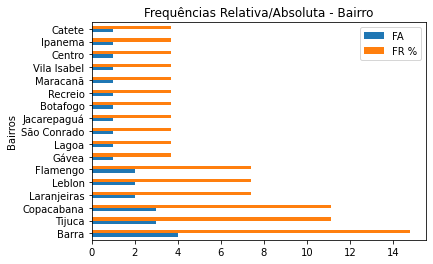

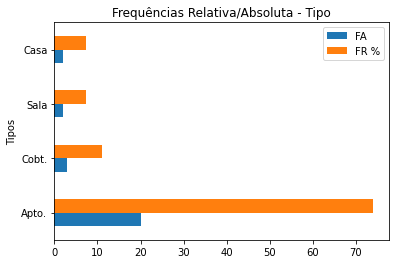

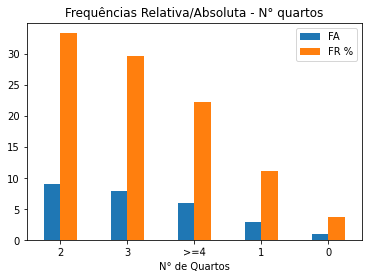

<AxesSubplot:title={'center':'Frequências Relativa/Absoluta - Preços'}, ylabel='Preços'>

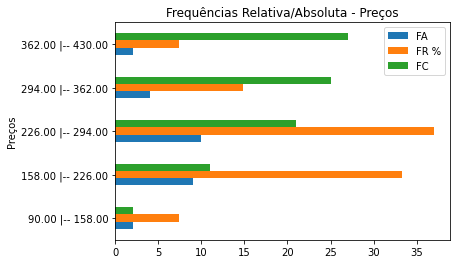

In [23]:
%matplotlib inline
df_bairro.plot.barh(title='Frequências Relativa/Absoluta - Bairro')
plt.show()
df_tipo.plot.barh(title='Frequências Relativa/Absoluta - Tipo')
plt.show()
df_n_quartos.plot.bar(title='Frequências Relativa/Absoluta - N° quartos', rot=True)
plt.show()
df_preco.plot.barh(title='Frequências Relativa/Absoluta - Preços')

## Questão 3 ##

### Letra a)

###### Turma: Qualitativa nominal
###### Gênero: Qualitativo nominal
###### Idade: Quantitativa discreta
###### Altura: Quantitativa contínua
###### Peso: Quantitativa contínua
###### Filhos: Quantitativa discreta
###### Fuma: Qualitativa nominal
###### Tolr: Qualitativa ordinal
###### Exerc: Quantitativa discreta
###### Cine: Quantitativa discreta
###### OpCine: Qualitativa ordinal
###### TV: Quantitativa discreta
###### OpTV: Qualitativa ordinal

In [24]:
df = pd.read_excel('dados3.xls')
df.head()

,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler,Exerc,Cine,OpCine,TV,OpTV
0,A,F,17,1.60,60.5,2,NAO,P,0,1,B,16,R
1,A,F,18,1.69,55.0,1,NAO,M,0,1,B,7,R
2,A,M,18,1.85,72.8,2,NAO,P,5,2,M,15,R
3,A,M,25,1.85,80.9,2,NAO,P,5,2,B,20,R
4,A,F,19,1.58,55.0,1,NAO,M,2,2,B,5,R


### Letra b)

In [25]:
# Para os qualitativos fiz a frequência com value_counts e quantitativos com a função.

df_turma = pd.DataFrame({'FA': df['Turma'].value_counts(),
                         'FR %': np.around(df['Turma'].value_counts()/df['Turma'].value_counts().sum()*100,decimals=2)}).rename_axis('Turma')

df_sexo = pd.DataFrame({'FA': df['Sexo'].value_counts(),
                         'FR %': np.around(df['Sexo'].value_counts()/df['Sexo'].value_counts().sum()*100,decimals=2)}).rename_axis('Sexo')

df_idade = pd.DataFrame({'FA': df['Idade'].value_counts(),
                         'FR %': np.around(df['Idade'].value_counts()/df['Idade'].value_counts().sum()*100,decimals=2)}).rename_axis('Idade')

df_alt = dis_freq(df['Alt'], 5, 'Altura')

df_peso = dis_freq(df['Peso'], 5, 'Peso')

df_filhos = pd.DataFrame({'FA': df['Filhos'].value_counts(),
                         'FR %': np.around(df['Filhos'].value_counts()/df['Filhos'].value_counts().sum()*100,decimals=2)}).rename_axis('Filhos')

df_fuma = pd.DataFrame({'FA': df['Fuma'].value_counts(),
                         'FR %': np.around(df['Fuma'].value_counts()/df['Fuma'].value_counts().sum()*100,decimals=2)}).rename_axis('Fuma')

df_toler = pd.DataFrame({'FA': df['Toler'].value_counts(),
                         'FR %': np.around(df['Toler'].value_counts()/df['Toler'].value_counts().sum()*100,decimals=2)}).rename_axis('Toler')

df_exerc = pd.DataFrame({'FA': df['Exerc'].value_counts(),
                         'FR %': np.around(df['Exerc'].value_counts()/df['Exerc'].value_counts().sum()*100,decimals=2)}).rename_axis('Exerc')

df_cine = pd.DataFrame({'FA': df['Cine'].value_counts(),
                         'FR %': np.around(df['Cine'].value_counts()/df['Cine'].value_counts().sum()*100,decimals=2)}).rename_axis('Cine')

df_opcine = pd.DataFrame({'FA': df['OpCine'].value_counts(),
                         'FR %': np.around(df['OpCine'].value_counts()/df['OpCine'].value_counts().sum()*100,decimals=2)}).rename_axis('OpCine')

df_TV = pd.DataFrame({'FA': df['TV'].value_counts(),
                         'FR %': np.around(df['TV'].value_counts()/df['TV'].value_counts().sum()*100,decimals=2)}).rename_axis('TV')

df_optv = pd.DataFrame({'FA': df['OpTV'].value_counts(),
                         'FR %': np.around(df['OpTV'].value_counts()/df['OpTV'].value_counts().sum()*100,decimals=2)}).rename_axis('OpTV')


In [26]:
display(df_turma)
display(df_sexo)
display(df_idade)
display(df_alt)
display(df_peso)
display(df_filhos)
display(df_fuma)
display(df_toler)
display(df_exerc)
display(df_cine)
display(df_opcine)
display(df_TV)
display(df_optv)

,FA,FR %
Turma,,
A,26,52.0
B,24,48.0


,FA,FR %
Sexo,,
F,37,74.0
M,13,26.0


,FA,FR %
Idade,,
18,22,44.0
17,9,18.0
19,7,14.0
20,4,8.0
21,3,6.0
23,2,4.0
25,2,4.0
24,1,2.0


,FA,FR %,FC
Altura,,,
1.45 |-- 1.53,1,2.0,1
1.53 |-- 1.61,12,24.0,13
1.61 |-- 1.69,15,30.0,28
1.69 |-- 1.77,14,28.0,42
1.77 |-- 1.85,8,16.0,50


,FA,FR %,FC
Peso,,,
44.00 |-- 54.20,15,30.0,15
54.20 |-- 64.40,21,42.0,36
64.40 |-- 74.60,7,14.0,43
74.60 |-- 84.80,3,6.0,46
84.80 |-- 95.00,4,8.0,50


,FA,FR %
Filhos,,
1,28,56.0
2,14,28.0
3,6,12.0
4,1,2.0
7,1,2.0


,FA,FR %
Fuma,,
NAO,44,88.0
SIM,6,12.0


,FA,FR %
Toler,,
P,21,42.0
M,19,38.0
I,10,20.0


,FA,FR %
Exerc,,
0,8,16.0
2,8,16.0
5,8,16.0
3,6,12.0
7,5,10.0
4,4,8.0
1,3,6.0
6,3,6.0
8,3,6.0


,FA,FR %
Cine,,
1,21,42.0
2,18,36.0
4,4,8.0
0,3,6.0
3,3,6.0
5,1,2.0


,FA,FR %
OpCine,,
B,32,64.0
M,18,36.0


,FA,FR %
TV,,
10,11,22.0
5,7,14.0
14,5,10.0
12,4,8.0
2,4,8.0
20,3,6.0
8,3,6.0
25,2,4.0
7,2,4.0


,FA,FR %
OpTV,,
R,39,78.0
N,7,14.0
B,3,6.0
M,1,2.0


### Questão 3

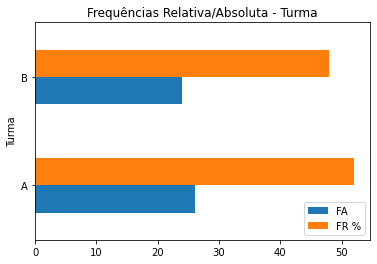

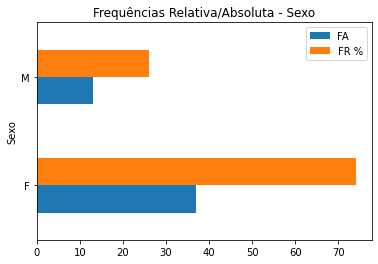

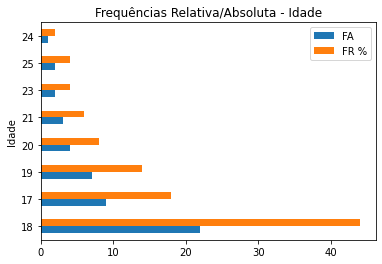

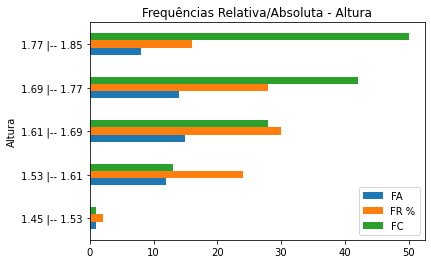

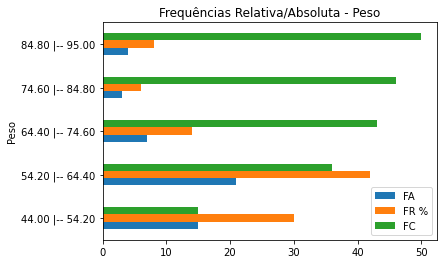

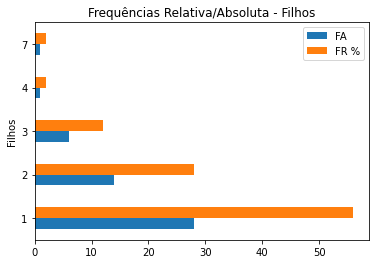

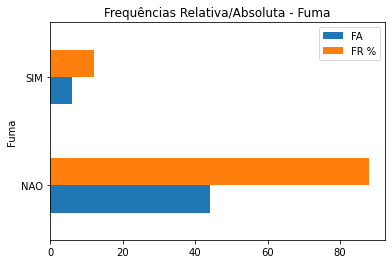

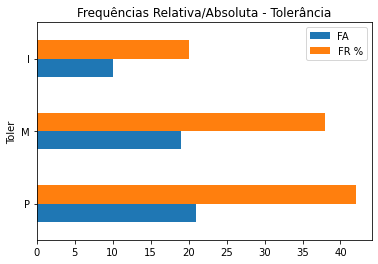

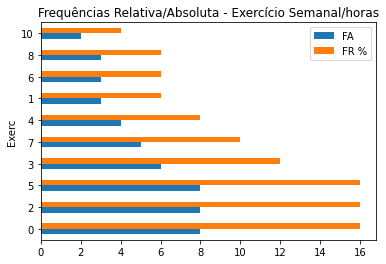

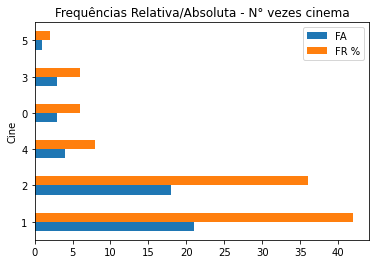

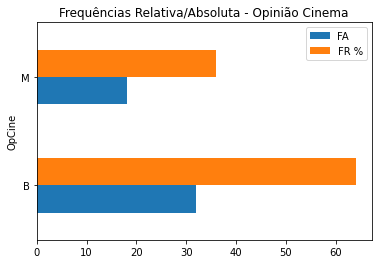

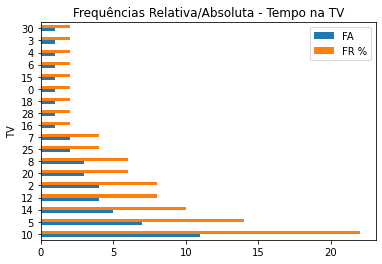

<AxesSubplot:title={'center':'Frequências Relativa/Absoluta - Opnião da TV'}, ylabel='OpTV'>

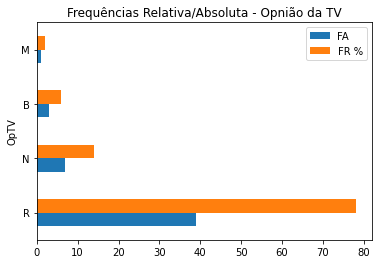

In [27]:
%matplotlib inline
df_turma.plot.barh(title='Frequências Relativa/Absoluta - Turma')
plt.show()
df_sexo.plot.barh(title='Frequências Relativa/Absoluta - Sexo')
plt.show()
df_idade.plot.barh(title='Frequências Relativa/Absoluta - Idade')
plt.show()
df_alt.plot.barh(title='Frequências Relativa/Absoluta - Altura')
plt.show()
df_peso.plot.barh(title='Frequências Relativa/Absoluta - Peso')
plt.show()
df_filhos.plot.barh(title='Frequências Relativa/Absoluta - Filhos')
plt.show()
df_fuma.plot.barh(title='Frequências Relativa/Absoluta - Fuma')
plt.show()
df_toler.plot.barh(title='Frequências Relativa/Absoluta - Tolerância')
plt.show()
df_exerc.plot.barh(title='Frequências Relativa/Absoluta - Exercício Semanal/horas')
plt.show()
df_cine.plot.barh(title='Frequências Relativa/Absoluta - N° vezes cinema')
plt.show()
df_opcine.plot.barh(title='Frequências Relativa/Absoluta - Opinião Cinema')
plt.show()
df_TV.plot.barh(title='Frequências Relativa/Absoluta - Tempo na TV')
plt.show()
df_optv.plot.barh(title='Frequências Relativa/Absoluta - Opnião da TV')